<a href="https://colab.research.google.com/github/GUC-DM/mini-project-3-georgina-adel-bit07-ahmed-walid-bit07/blob/main/Mini-Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project 3 - Association Rule Mining

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ahmed Walid El Bourgy

ID: 43-2812

Tutorial: T-07

---

Name: Georgina Adel Naguib Habib

ID: 43-2654

Tutorial: T-07

---


## Background

The marketing department of a financial firm keeps records on customers, including demographic information and the type of accounts. A new product, ["Personal Equity Plan" (PEP)](https://www.investopedia.com/terms/p/pep.asp), was launched and advertised by mail to the firm's existing customers, and a record was kept as to whether that customer responded and bought the product. To better understand their customer base, the managers decided to use data mining techniques to build customer profiles based on the data the firm already has.

## Mini-Project Task

Apply an association rule mining algorithm to discover patterns in customer behavior (you should aim to get at least 20-30 strong rules after experimenting with the algorithm's parameters).

In addition, select the five most "interesting" rules and briefly write for each:
- an explanation of the pattern and why you believe it is interesting based on the business objectives of the company;
- any recommendations based on the discovered rule that might help the company to better understand behavior of its customers or in its marketing campaign.

These are not necessarily the top five rules you'd get from the association rules algorithm. In addition to having high support, lift and confidence, they should be rules that provide non-trivial, actionable knowledge for the given business scenario.

## Dataset Description

| Column       | Description                                                                       |
| ------------ | --------------------------------------------------------------------------------- |
| id           | a unique identification number                                                    |
| age          | age of customer in years (numeric)                                                |
| sex          | MALE / FEMALE                                                                     |
| region       | inner_city/rural/suburban/town                                                    |
| income       | income of customer (numeric)                                                      |
| married      | is the customer married (YES/NO)                                                  |
| children     | number of children (numeric)                                                      |
| car          | does the customer own a car (YES/NO)                                              |
| save_acct    | does the customer have a saving account (YES/NO)                                  |
| current_acct | does the customer have a current account (YES/NO)                                 |
| mortgage     | does the customer have a mortgage (YES/NO)                                        |
| pep          | did the customer buy a PEP (Personal Equity Plan) after the last mailing (YES/NO) |


**Acknowledgment**: The dataset and description is attributed to Prof. Bamshad Mobasher.

**Hint**: all the columns are important to use for association rule mining except for one, which should be dropped in pre-processing

**Note**: the data URL is https://raw.githubusercontent.com/GUC-DM/W2020/main/data/bank_data.csv

In [143]:
# Execute this cell and restart the kernel to install the package needed for association rule mining
!pip install mlxtend --upgrade

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.18.0)


In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('bank_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2020/main/data/bank_data.csv')
df

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,ID12699,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO


In [145]:
df['bucket_Income']=pd.cut(df['income'],2,labels=['low','high'])
df

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep,bucket_Income
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES,low
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO,low
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO,low
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO,low
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO,high
596,ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO,low
597,ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES,low
598,ID12699,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO,low


In [146]:
df['bucket_age']=pd.cut(df['age'],3,labels=['young','middle_ages', 'old'])
df

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep,bucket_Income,bucket_age
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES,low,middle_ages
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO,low,middle_ages
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO,low,old
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO,low,young
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO,high,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO,high,old
596,ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO,low,young
597,ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES,low,young
598,ID12699,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO,low,young


In [147]:
df.isnull().sum()

id               0
age              0
sex              0
region           0
income           0
married          0
children         0
car              0
save_act         0
current_act      0
mortgage         0
pep              0
bucket_Income    0
bucket_age       0
dtype: int64

Here, we dropped the customer ID because it will not be as useful to us in our rule associating at all.

In [148]:
df=df.drop(['id'], axis=1)

In [149]:
df_encoded

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep,bucket_Income,bucket_age
0,48,0,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES,High,middle_ages
1,40,1,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO,High,middle_ages
2,51,0,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO,High,old
3,23,0,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO,High,young
4,57,0,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO,Low,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,0,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO,Low,old
596,30,0,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO,High,young
597,31,0,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES,High,young
598,29,1,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO,High,young


In [153]:
df_encoded=df.copy()
categorical_columns = ['bucket_Income','save_act'	,'current_act',	'mortgage', 'bucket_Income', 'sex', 'pep', 'married']
df_encoded_one = pd.get_dummies(data=df_encoded,columns=categorical_columns,drop_first=True,dtype='int8')
df_encoded_one = df_encoded_one[['save_act_YES'	,'current_act_YES',	'mortgage_YES'	,'bucket_Income_high'	,'sex_MALE'	,'pep_YES',	'married_YES']]


In [ ]:

#from sklearn.preprocessing import LabelEncoder
#ml= LabelEncoder()
#df_encoded['married'] = ml.fit_transform(df['married'])
#df_encoded['car'] = ml.fit_transform(df['car'])
#df_encoded['save_act'] = ml.fit_transform(df['save_act'])
#df_encoded['current_act'] = ml.fit_transform(df['current_act'])
#df_encoded['mortgage'] = ml.fit_transform(df['mortgage'])
#df_encoded['pep'] = ml.fit_transform(df['pep'])

#df_encoded

So, here, we can see that the number of people that have no Personal equity plan are more than those who already have it

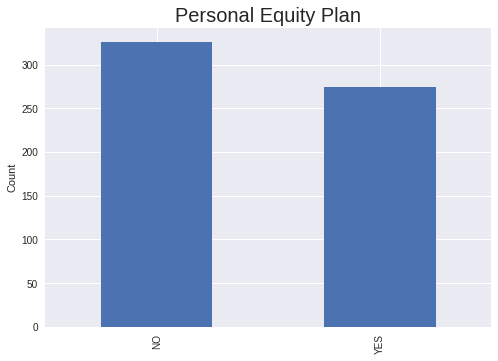

In [154]:
ax = df_encoded['pep'].value_counts().nlargest(20).plot(kind='bar')
ax.set_title('Personal Equity Plan', size=20)
ax.set_ylabel('Count');

In [155]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            600 non-null    int64   
 1   sex            600 non-null    object  
 2   region         600 non-null    object  
 3   income         600 non-null    float64 
 4   married        600 non-null    object  
 5   children       600 non-null    int64   
 6   car            600 non-null    object  
 7   save_act       600 non-null    object  
 8   current_act    600 non-null    object  
 9   mortgage       600 non-null    object  
 10  pep            600 non-null    object  
 11  bucket_Income  600 non-null    category
 12  bucket_age     600 non-null    category
dtypes: category(2), float64(1), int64(2), object(8)
memory usage: 53.1+ KB


In [166]:
from mlxtend.frequent_patterns import fpgrowth, association_rules



freq_items = fpgrowth(df_encoded_one, min_support=0.05, use_colnames=True)
freq_items.sort_values('support', ascending=False)

,support,itemsets
1,0.758333,(current_act_YES)
5,0.690000,(save_act_YES)
2,0.660000,(married_YES)
58,0.531667,"(save_act_YES, current_act_YES)"
3,0.500000,(sex_MALE)
...,...,...
90,0.051667,"(married_YES, sex_MALE, pep_YES, bucket_Income..."
155,0.051667,"(married_YES, sex_MALE, pep_YES, bucket_Income..."
79,0.051667,"(mortgage_YES, sex_MALE, bucket_Income_high)"
158,0.051667,"(married_YES, sex_MALE, pep_YES, bucket_Income..."


In [185]:
association_rules(freq_items, metric='confidence', min_threshold=0.75).sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,"(mortgage_YES, current_act_YES, bucket_Income_...",(save_act_YES),0.065000,0.690000,0.058333,0.897436,1.300632,0.013483,3.022500
28,"(married_YES, mortgage_YES, bucket_Income_high)",(save_act_YES),0.063333,0.690000,0.056667,0.894737,1.296720,0.012967,2.945000
26,"(mortgage_YES, bucket_Income_high)",(save_act_YES),0.090000,0.690000,0.080000,0.888889,1.288245,0.017900,2.790000
22,"(married_YES, pep_YES, bucket_Income_high)",(save_act_YES),0.090000,0.690000,0.080000,0.888889,1.288245,0.017900,2.790000
12,"(married_YES, bucket_Income_high)",(save_act_YES),0.186667,0.690000,0.165000,0.883929,1.281056,0.036200,2.670769
15,"(married_YES, current_act_YES, bucket_Income_h...",(save_act_YES),0.143333,0.690000,0.126667,0.883721,1.280755,0.027767,2.666000
25,"(married_YES, pep_YES, current_act_YES, bucket...",(save_act_YES),0.068333,0.690000,0.060000,0.878049,1.272534,0.012850,2.542000
18,"(pep_YES, bucket_Income_high)",(save_act_YES),0.161667,0.690000,0.141667,0.876289,1.269984,0.030117,2.505833
10,(bucket_Income_high),(save_act_YES),0.280000,0.690000,0.245000,0.875000,1.268116,0.051800,2.480000
17,"(current_act_YES, bucket_Income_high)",(save_act_YES),0.221667,0.690000,0.193333,0.872180,1.264030,0.040383,2.425294


In [169]:
association_rules(freq_items, metric='lift', min_threshold=1).sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
357,"(save_act_YES, pep_YES)","(sex_MALE, bucket_Income_high)",0.298333,0.143333,0.075000,0.251397,1.753930,0.032239,1.144353
360,"(sex_MALE, bucket_Income_high)","(save_act_YES, pep_YES)",0.143333,0.298333,0.075000,0.523256,1.753930,0.032239,1.471789
223,(bucket_Income_high),"(save_act_YES, pep_YES, current_act_YES)",0.280000,0.233333,0.111667,0.398810,1.709184,0.046333,1.275248
210,"(save_act_YES, pep_YES, current_act_YES)",(bucket_Income_high),0.233333,0.280000,0.111667,0.478571,1.709184,0.046333,1.380822
199,(bucket_Income_high),"(save_act_YES, pep_YES)",0.280000,0.298333,0.141667,0.505952,1.695930,0.058133,1.420241
...,...,...,...,...,...,...,...,...,...
10,"(save_act_YES, sex_MALE)",(pep_YES),0.346667,0.456667,0.158333,0.456731,1.000140,0.000022,1.000118
53,(sex_MALE),"(married_YES, save_act_YES, current_act_YES)",0.500000,0.343333,0.171667,0.343333,1.000000,0.000000,1.000000
83,"(save_act_YES, mortgage_YES)","(sex_MALE, current_act_YES)",0.240000,0.375000,0.090000,0.375000,1.000000,0.000000,1.000000
86,"(sex_MALE, current_act_YES)","(save_act_YES, mortgage_YES)",0.375000,0.240000,0.090000,0.240000,1.000000,0.000000,1.000000


In [ ]:
#freq_items = fpgrowth(df_used[df_used['pep'] == 1], min_support=0.05, use_colnames=True)
#freq_items.nlargest(15, 'support')